In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import os.path
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from PIL import Image

# Reading and Splitting the Data

In [2]:
os.chdir(r'C:\Users\vasan\Desktop\Brain Tumour Project\Classification\archive')

In [3]:
os.getcwd()

'C:\\Users\\vasan\\Desktop\\Brain Tumour Project\\Classification\\archive'

In [4]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=42)

In [7]:
y_train[0]

'meningioma_tumor'

In [8]:
X_train.shape

(3264, 150, 150, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Building a Classic CNN Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models, layers

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
mc = ModelCheckpoint("classic_ver2.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
es=EarlyStopping(monitor="loss",mode="min",patience=8)

In [15]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =80, verbose=1, batch_size=32,
                   callbacks=[mc,es])


Epoch 1/80
83/83 [==============================] - 19s 111ms/step - loss: 7.5362 - accuracy: 0.3330 - val_loss: 1.3191 - val_accuracy: 0.4524

Epoch 00001: val_accuracy improved from -inf to 0.45238, saving model to classic_ver2.h5
Epoch 2/80
83/83 [==============================] - 7s 84ms/step - loss: 1.2185 - accuracy: 0.4351 - val_loss: 1.1458 - val_accuracy: 0.4830

Epoch 00002: val_accuracy improved from 0.45238 to 0.48299, saving model to classic_ver2.h5
Epoch 3/80
83/83 [==============================] - 7s 84ms/step - loss: 1.0938 - accuracy: 0.5184 - val_loss: 1.0334 - val_accuracy: 0.5578

Epoch 00003: val_accuracy improved from 0.48299 to 0.55782, saving model to classic_ver2.h5
Epoch 4/80
83/83 [==============================] - 7s 84ms/step - loss: 1.0199 - accuracy: 0.5558 - val_loss: 0.9356 - val_accuracy: 0.5884

Epoch 00004: val_accuracy improved from 0.55782 to 0.58844, saving model to classic_ver2.h5
Epoch 5/80
83/83 [==============================] - 7s 84ms/step 

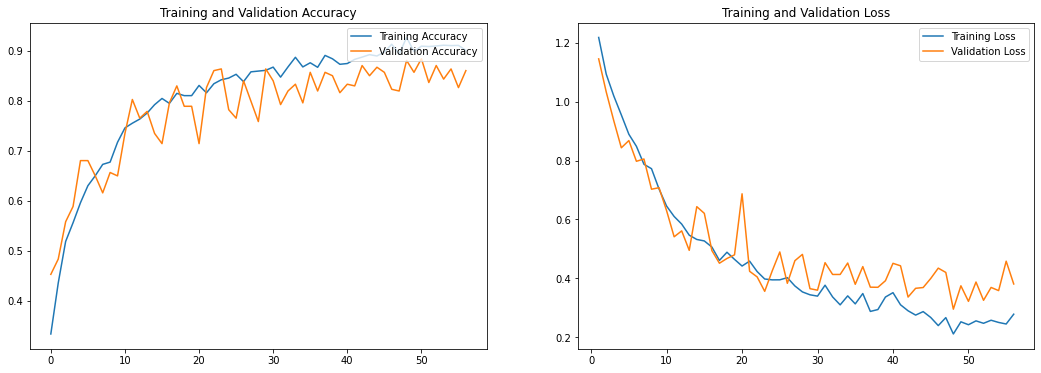

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
plt.plot(epochs_range[1:], val_loss[1:], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

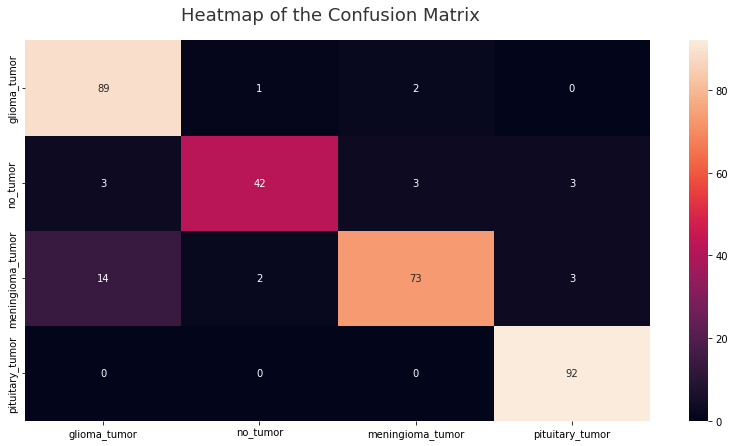

In [18]:
import seaborn as sns
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix', size=18, y=0.92,x=0.28,alpha=0.8)
plt.show()

# Transfer Learning

## Model 1

In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import ReduceLROnPlateau
image_size=150
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model1 = effnet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=effnet.input, outputs = model1)

In [20]:
model1 = effnet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=effnet.input, outputs = model1)

In [21]:
model1.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [22]:
checkpoint = ModelCheckpoint("effnet1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.2, patience = 3, min_delta = 0.001,
                              mode='auto',verbose=1)

In [23]:
history = model1.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

Epoch 1/25
83/83 [==============================] - 31s 284ms/step - loss: 0.4550 - accuracy: 0.8316 - val_loss: 2.3009 - val_accuracy: 0.6327

Epoch 00001: val_accuracy improved from -inf to 0.63265, saving model to effnet1.h5


C:\Users\vasan\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/25
83/83 [==============================] - 20s 237ms/step - loss: 0.1982 - accuracy: 0.9330 - val_loss: 2.5881 - val_accuracy: 0.5748

Epoch 00002: val_accuracy did not improve from 0.63265
Epoch 3/25
83/83 [==============================] - 20s 238ms/step - loss: 0.1325 - accuracy: 0.9535 - val_loss: 1.7488 - val_accuracy: 0.7007

Epoch 00003: val_accuracy improved from 0.63265 to 0.70068, saving model to effnet1.h5
Epoch 4/25
83/83 [==============================] - 20s 238ms/step - loss: 0.1171 - accuracy: 0.9614 - val_loss: 0.6152 - val_accuracy: 0.8231

Epoch 00004: val_accuracy improved from 0.70068 to 0.82313, saving model to effnet1.h5
Epoch 5/25
83/83 [==============================] - 19s 234ms/step - loss: 0.0708 - accuracy: 0.9796 - val_loss: 0.5035 - val_accuracy: 0.8707

Epoch 00005: val_accuracy improved from 0.82313 to 0.87075, saving model to effnet1.h5
Epoch 6/25
83/83 [==============================] - 20s 239ms/step - loss: 0.0954 - accuracy: 0.9701 - val_l

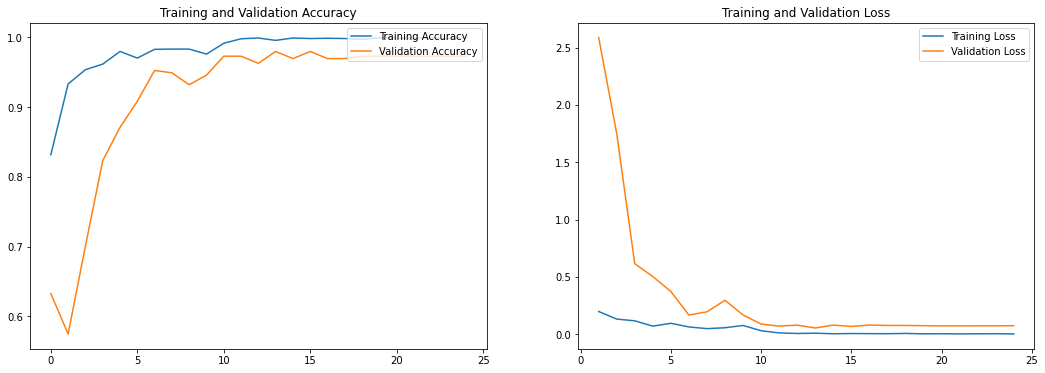

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
plt.plot(epochs_range[1:], val_loss[1:], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
pred = model1.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

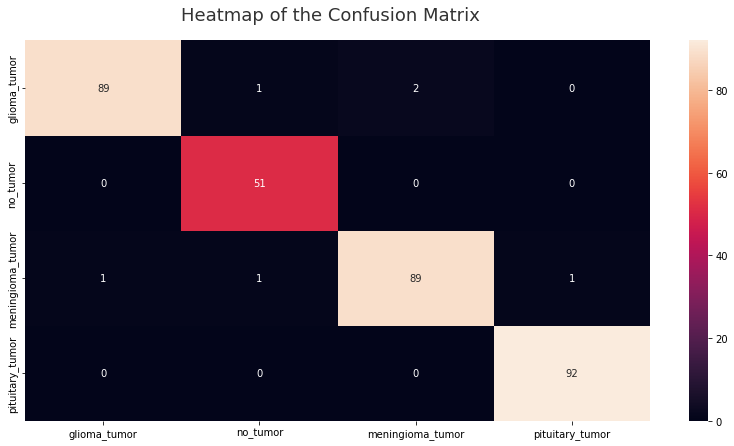

In [26]:
import seaborn as sns
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix', size=18, y=0.92,x=0.28,alpha=0.8)
plt.show()

In [ ]:
model.save("classic_cnn.h5")
model1.save("final_tl.h5")